# WEEK IV **Convolutional Neural Networks**
## Multi Class Classifier with CNN using CIFAR 10 dataset
**Note:** Since we are working with Image-based dataset, choose the runtime environment GPU or TPU from the Runtime menuItem

## 1) Import all required libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 2) Split your dataset into train and validation

### You can start by setting a seed value. The seed is given an integer value to ensure that the results of pseudo-random generation are reproducible. **Reproducibility** is a very important concept that ensures that anyone who re-runs the code gets the exact same outputs.

In [ ]:
import numpy as np
import tensorflow as tf
import random

# 1. Set Python's built-in random seed
random.seed(42)

# 2. Set NumPy seed
np.random.seed(42)

# 3. Set TensorFlow seed
tf.random.set_seed(42)

In [ ]:
# loading datset from CIFAR 10
from keras.datasets import cifar10
# creating training and testing datset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


# 3) Examine the dataset

In [ ]:
# CIFAR 10 is a classifier capable of classifying among following 10 classes/labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# lets print the shape of our dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**Displaying  the first Image (at index=0) in the training dataset**

The image label  for first training image is:  [1]
The label/class of the image below is:  automobile


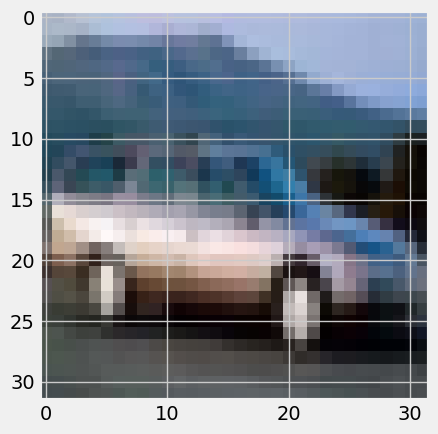

In [ ]:
# we need to use imshow to view the first image of the training dataset
img = plt.imshow(x_train[4])
print('The image label  for first training image is: ', y_train[4])
#Print the image class
print('The label/class of the image below is: ', class_names[y_train[4][0]])

## 4) Lets encode the class labels using one-hot encoding
### The Keras API provides a to_categorical() method that can be used to one-hot encode integer data.

In [ ]:
from keras import utils as np_utils
# for training, labels should be encoded using one hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [ ]:
print('One-hot encode for the', class_names[y_train[0][0]], y_train_one_hot[0])
print('One-hot encode for the first test dataset Image', y_test_one_hot[0])

One-hot encode for the frog [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
One-hot encode for the first test dataset Image [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# 5) Scaling the dataset

In [ ]:
# scaling the dataset
x_train = x_train / 255
x_test = x_test/ 255


# 6) Design a CNN model for training

In [ ]:
model = Sequential()
# 62 are number of filters and 3x3 is the size
model.add(Conv2D(64, (3, 3),padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 16)          0

# 7) Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_one_hot,
           batch_size=10, epochs=15, validation_split=0.2 )

Epoch 1/15
4000/4000 [==============================] - 22s 4ms/step - loss: 1.6575 - accuracy: 0.3916 - val_loss: 1.4012 - val_accuracy: 0.4998
Epoch 2/15
4000/4000 [==============================] - 18s 4ms/step - loss: 1.3470 - accuracy: 0.5159 - val_loss: 1.2735 - val_accuracy: 0.5467
Epoch 3/15
4000/4000 [==============================] - 17s 4ms/step - loss: 1.2303 - accuracy: 0.5583 - val_loss: 1.2490 - val_accuracy: 0.5548
Epoch 4/15
4000/4000 [==============================] - 17s 4ms/step - loss: 1.1701 - accuracy: 0.5803 - val_loss: 1.1441 - val_accuracy: 0.5875
Epoch 5/15
4000/4000 [==============================] - 18s 4ms/step - loss: 1.1242 - accuracy: 0.5983 - val_loss: 1.1392 - val_accuracy: 0.5965
Epoch 6/15
4000/4000 [==============================] - 17s 4ms/step - loss: 1.0895 - accuracy: 0.6130 - val_loss: 1.1018 - val_accuracy: 0.6043
Epoch 7/15
4000/4000 [==============================] - 18s 4ms/step - loss: 1.0626 - accuracy: 0.6212 - val_loss: 1.1107 - val_ac

In [ ]:
model.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 1s 4ms/step - loss: 1.0233 - accuracy: 0.6415


[1.0232590436935425, 0.6414999961853027]

# 8) Plot Diagnostics
from above training, we get four metrices loss, accuracy, val_loss, and val_accuracy. we need to draw a plot between loss values and accuracy values to check the model performance

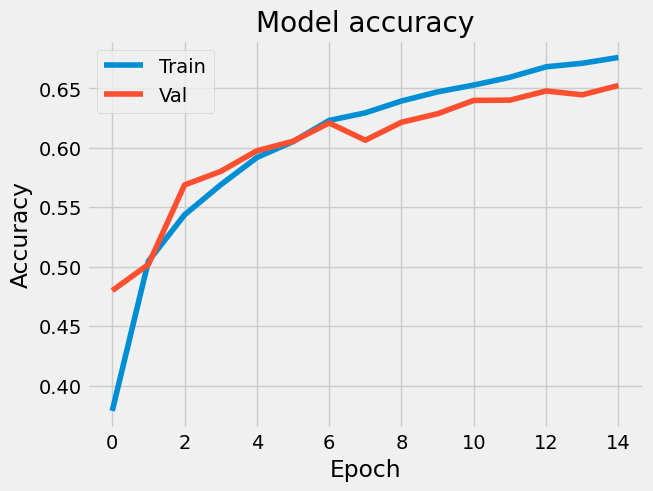

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

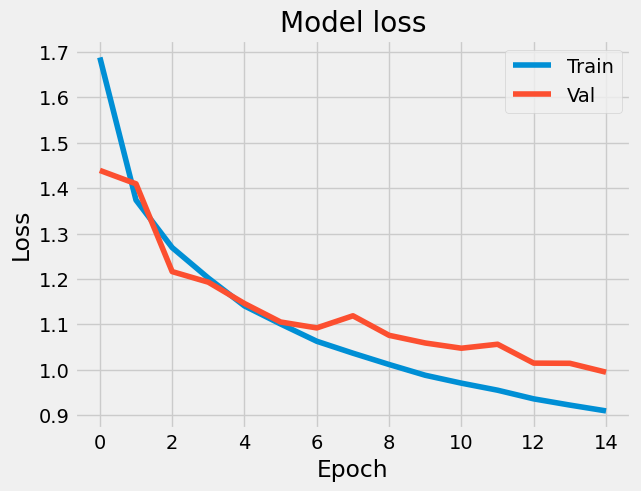

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# 9) Time to test your model
## Before doing external testing, think if your model is ready for it?
### Check your validation loss and accuracy as it gives you a green signal to test your model
get any image fom the internet belonging to the trained classes to test how well you rmodel works? I chose cat!

### a) Read the image

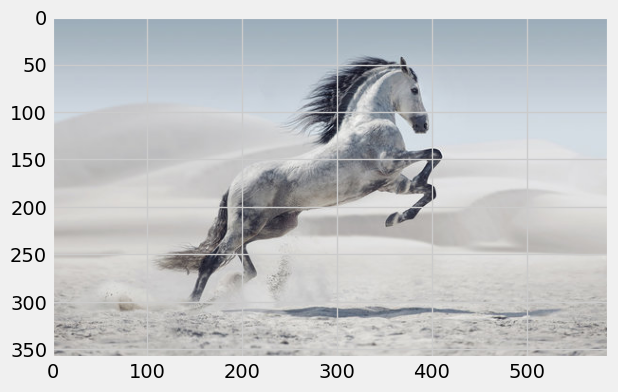

In [ ]:
Test_DATA_PATH = '/content/drive/MyDrive/horse1.jpg'

ImageFS = plt.imread(Test_DATA_PATH)
ImageFS.shape
plt.imshow(ImageFS)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


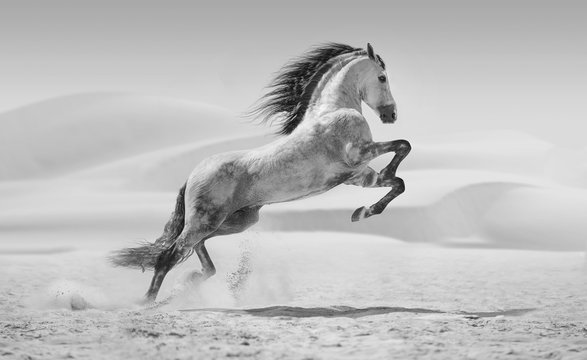

In [ ]:
import cv2;
from google.colab.patches import cv2_imshow
Image = cv2.imread(Test_DATA_PATH)
gray = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
gray_three = cv2.merge([gray,gray,gray])
cv2_imshow(gray_three);

### b) resize the image based on the size,  your model is trained on

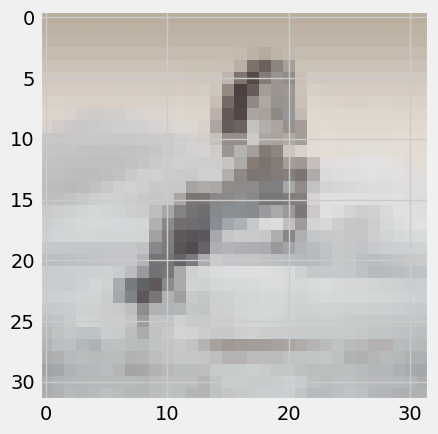

In [ ]:
from skimage.transform import resize
RImage = resize(Image, (32,32,3))
img = plt.imshow(RImage)

### c) Make predictions

In [ ]:
predictions = model.predict(np.array( [RImage] ))

1/1 [==============================] - 0s 319ms/step


In [ ]:
predictions

array([[6.8082087e-02, 4.0398404e-04, 6.0314495e-02, 4.8969027e-01,
        3.7678357e-02, 2.4326971e-01, 3.1645347e-03, 8.9057490e-02,
        7.3685003e-03, 9.7054272e-04]], dtype=float32)

In [ ]:
# these are the predictions probability for all 10 classes for that test image, we can decode thier name by
# predictions

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
# Bubble sort
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[3, 5, 7, 0, 2, 4, 8, 6, 9, 1]


In [ ]:
i=0
for i in range(5):
  print(class_names[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 48.97 %
dog : 24.33 %
horse : 8.91 %
airplane : 6.81 %
bird : 6.03 %


### d) Save the model, if it performed well

In [ ]:
model.save('model1.keras')

## 10) Test Model with Test dataset images

In [ ]:
predictions = model.predict(x_test)

In [ ]:
#predictions

# TASK 1: Draw a confusion Matrix to illustrate the performance of your model

**Print the Predictions, Did you notice? they are floats and we need one class label for each test Image. How to do that?**

In [ ]:
# How to assign each x_test Image that label which has the highest confidence score


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




# TASK 2: Print the Classification Report of the Testing